In [17]:
import  pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import numpy as np

In [4]:
sales_points = pd.read_csv("D:\\Competitions\\DataStorm-2022\\data\\SalesPointsV2.csv")

In [5]:
sales_points

,Unnamed: 0,ItemCode,#sales,stage,WeeklySales
0,0,3418,21,validation,"[29, 42, 41, 41, 44, 46, 43, 49, 54, 69, 101, ..."
1,1,3427,21,validation,"[11, 40, 20, 48, 54, 28, 36, 52, 42, 57, 46, 4..."
2,2,7666,21,validation,"[84, 119, 196, 185, 94, 15, 10, 30, 79, 82, 14..."
3,3,9925,21,test,"[1, 9, 11, 13, 5, 11, 11, 13, 12, 10, 21, 15, ..."
4,4,16936,21,test,"[9, 25, 40, 31, 21, 43, 7, 34, 151, 32, 28, 25..."
...,...,...,...,...,...
189,189,1101769,21,test,"[8, 3, 0, 0, 18, 20, 22, 17, 14, 1, 0, 2, 0, 0..."
190,190,1103056,19,test,"[8, 12, 28, 27, 20, 17, 24, 19, 12, 7, 18, 11,..."
191,191,1105009,18,validation,"[5, 5, 10, 17, 17, 4, 6, 9, 4, 7, 2, 6, 6, 7, ..."
192,192,1105018,17,test,"[3, 6, 11, 4, 7, 8, 6, 7, 10, 12, 4, 10, 10, 1..."


In [28]:
def build_arima_model(lis_data,result,order=(5,1,0),show_fig=False,show_summary=False):
    model = ARIMA(lis_data, order=order)
    model_fit = model.fit()
    if show_summary:
        # summary of fit model
        print(model_fit.summary())

    if show_fig:
        # line plot of residuals
        residuals = pd.DataFrame(model_fit.resid)
        residuals.plot()
        plt.show()
        # density plot of residuals
        residuals.plot(kind='kde')
        plt.show()
        # summary stats of residuals
        print(residuals.describe())

    result["arima_model"] = model
    result["model_data"] = model_fit
    return result

d:\competitions\datastorm-2022\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   21
Model:                 ARIMA(5, 1, 0)   Log Likelihood                 -89.420
Date:                Sat, 26 Mar 2022   AIC                            190.840
Time:                        15:32:31   BIC                            196.815
Sample:                             0   HQIC                           192.006
                                 - 21                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7380      0.331     -2.230      0.026      -1.387      -0.089
ar.L2         -0.3865      0.471     -0.820      0.412      -1.310       0.537
ar.L3         -0.4409      0.400     -1.103      0.2

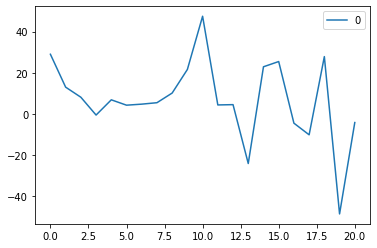

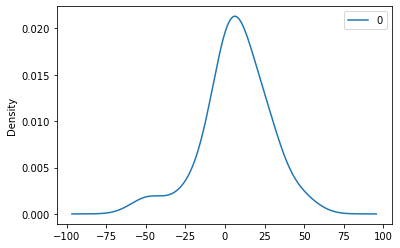

               0
count  21.000000
mean    6.851326
std    20.130941
min   -48.584513
25%    -0.539034
50%     5.461493
75%    21.619300
max    47.479677


In [29]:
models_list = {}
for i in sales_points.index:
    result = dict()
    product_series = sales_points.iloc[i]
    result["input_data"] = product_series
    __data = eval(product_series["WeeklySales"])
    build_arima_model(__data,result,show_fig=True,show_summary=True)

    models_list[product_series["ItemCode"]] = result
    break